<a href="https://www.kaggle.com/code/ahmedtarek26/understanding-diabetes-risk-factors?scriptVersionId=246586614" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 📘 Scientific Question and Study Design


## 🔍 Scientific Question
What are the associations between risk factors (e.g., high blood pressure, BMI, smoking) and diabetes/prediabetes prevalence in U.S. adults, and how do age and sex influence these associations?

## 🧪 Study Design
The dataset used in this analysis is derived from the **Behavioral Risk Factor Surveillance System (BRFSS) 2015 survey**, which is a cross-sectional study collecting health-related data from a population sample at a single point in time. The specific dataset, ``diabetes_binary_5050split_health_indicators_BRFSS2015.csv``, has been modified to include an equal number of individuals with diabetes (cases) and without diabetes (controls), creating a 50/50 split. This manipulation transforms the dataset to resemble a case-control study design, where cases and controls are deliberately balanced. While the original cross-sectional nature of BRFSS allows prevalence estimation.


In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     


── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "diabetes-health-indicators-dataset"

# 🧾 Data preprocessing : IDA initial data analysis / descriptive statistics )

### Descriptive Analysis

# Diabetes Health Indicators Dataset Analysis

## Dataset Overview
- **Total Observations**: 70,692
- **Target Variable**: `Diabetes_binary` (0: No Diabetes, 1: Diabetes/Prediabetes)
- **Class Distribution**: 
  - Non-Diabetic: 35,346 (50.0%)
  - Diabetic/Prediabetic: 35,346 (50.0%)
- **Year Collected**: 2015
- **Source**: BRFSS (Behavioral Risk Factor Surveillance System)

## Key Health Indicators

| Indicator            | Category          | Overall % | Diabetic % | Non-Diabetic % |
|----------------------|-------------------|-----------|------------|----------------|
| **High Blood Pressure** | No High BP      | 64.4%     | 25%      | 70%          |
|                      | High BP          | 35.6%     | 75%      | 30%          |
| **High Cholesterol**   | No High Chol    | 57.8%     | 29.5%      | 69.1%          |
|                      | High Chol       | 42.2%     | 70.5%      | 30.9%          |

## Continuous Variables

| Variable            | Overall Mean | Diabetic Mean | Non-Diabetic Mean | Std Dev |
|---------------------|--------------|---------------|-------------------|---------|
| **BMI**            | 29.5         | 32.1          | 25.1              | 6.7     |
## Diabetes Prevalence by Age

| Age Range | Age Code | Total Count | Diabetic Count | Prevalence |
|-----------|----------|-------------|----------------|------------|
| 18-24     | 1        | 6,714       | 545            | 8.1%       |
| 25-29     | 2        | 5,231       | 553            | 10.6%      |
| 30-34     | 3        | 7,039       | 1,017          | 14.5%      |
| 35-39     | 4        | 7,559       | 1,497          | 19.8%      |
| 40-44     | 5        | 8,812       | 2,096          | 23.8%      |
| 45-49     | 6        | 9,874       | 3,142          | 31.8%      |
| **50-54**     | 7        | **10,206**      | 3,892          | 38.1%      |
| **55-59**     | 8        | **10,142**      | 4,576          | 45.1%      |
| 60-64     | 9        | 8,887       | 4,526          | 50.9%      |
| 65-69     | 10       | 6,349       | 3,645          | 57.4%      |
| **70-74**     | 11       | 4,327       | 2,615          | **60.4%**      |
| **75-79**     | 12       | 2,762       | 1,738          | **62.9%**      |
| **80+**       | 13       | 1,790       | 1,157          | **64.6%**      |





### Graphs


=== Data Preprocessing ===


Preview of Preprocessed Data:


# A tibble: 6 × 22
  Diabetes_binary HighBP     HighChol     CholCheck   BMI Smoker Stroke
  <fct>           <fct>      <fct>            <dbl> <dbl>  <dbl>  <dbl>
1 No Diabetes     High BP    No High Chol         1    26      0      0
2 No Diabetes     High BP    High Chol            1    26      1      1
3 No Diabetes     No High BP No High Chol         1    26      0      0
4 No Diabetes     High BP    High Chol            1    28      1      0
5 No Diabetes     No High BP No High Chol         1    29      1      0
6 No Diabetes     No High BP No High Chol         1    18      0      0
# ℹ 15 more variables: HeartDiseaseorAttack <dbl>, PhysActivity <dbl>,
#   Fruits <dbl>, Veggies <dbl>, HvyAlcoholConsump <dbl>, AnyHealthcare <dbl>,
#   NoDocbcCost <dbl>, GenHlth <dbl>, MentHlth <dbl>, PhysHlth <dbl>,
#   DiffWalk <dbl>, Sex <fct>, Age <dbl>, Education <dbl>, Income <dbl>



=== Graph 1: Distribution of Diabetes Status ===


Saving 12.5 x 6.67 in image



=== Graph 2: BMI Distribution by Diabetes Status ===


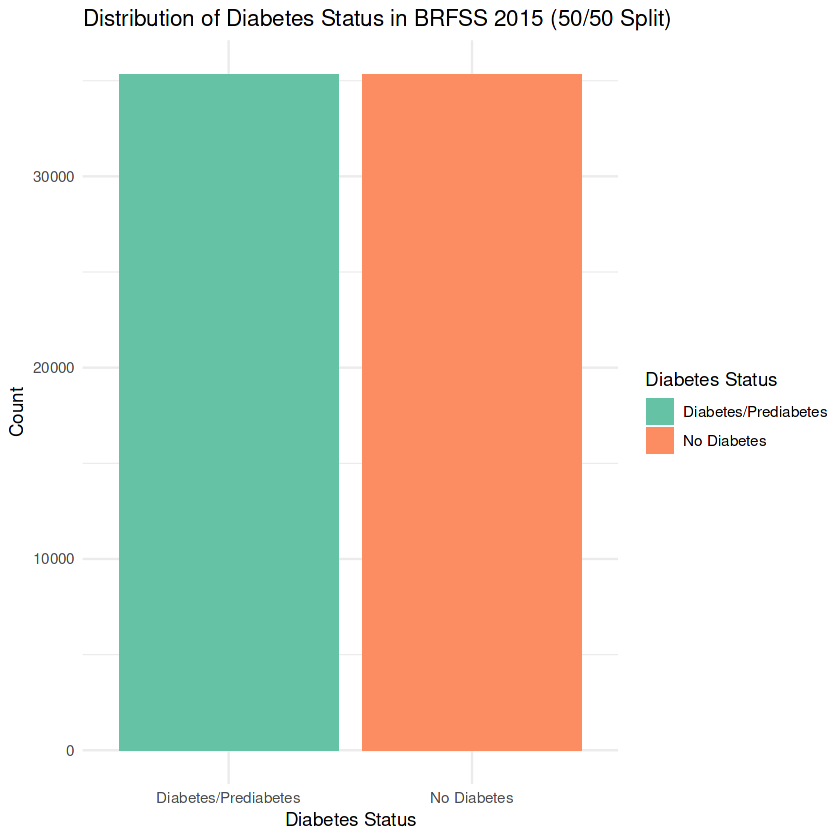

Saving 12.5 x 6.67 in image



=== Graph 3: Age Distribution by Diabetes Status ===


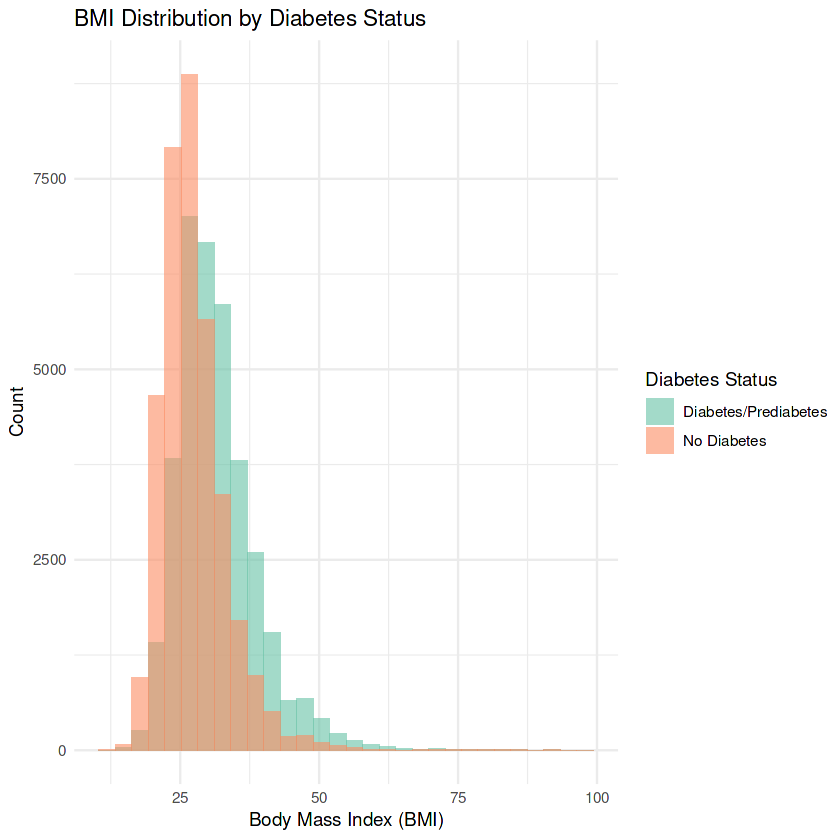

Saving 12.5 x 6.67 in image



=== Graph 4: High Cholestrol  and Sex by Diabetes Status ===


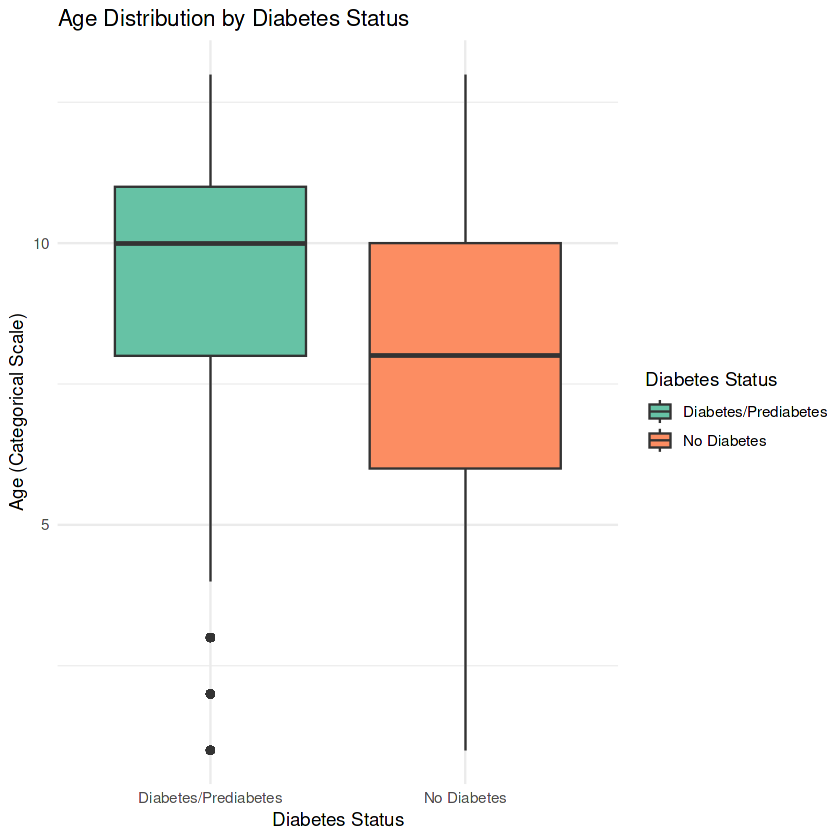

Saving 12.5 x 6.67 in image



=== Graph 4: High Blood Pressure and Sex by Diabetes Status ===


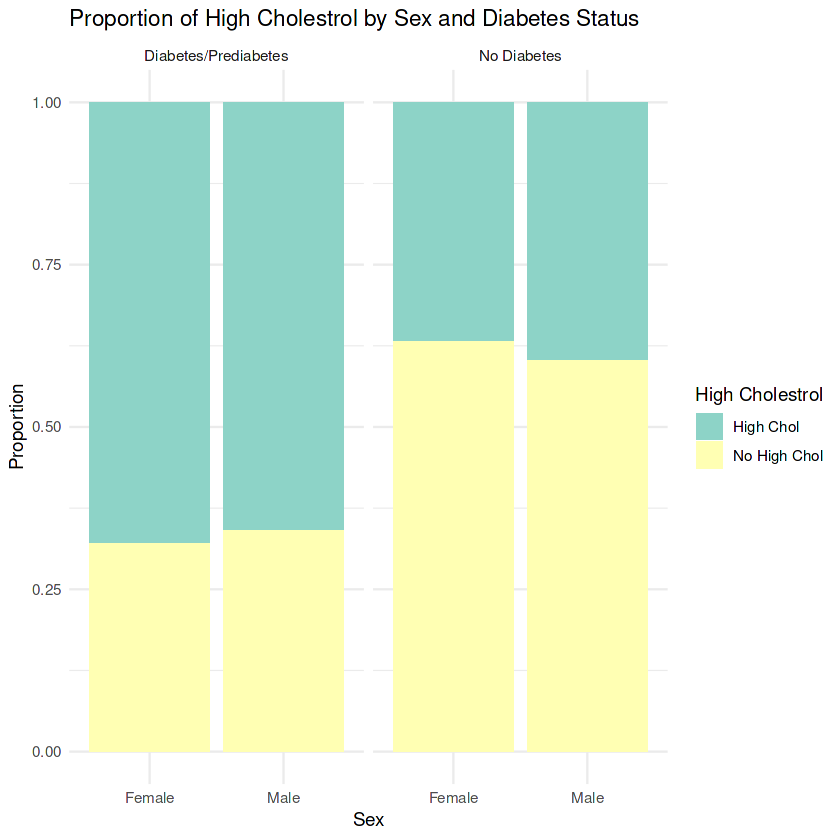

Saving 12.5 x 6.67 in image



=== Notes on Visualizations ===


Graphs saved as PNG files in working directory.


Key insights:


- Bar plot shows balanced 50/50 split between No Diabetes and Diabetes/Prediabetes.


- BMI histogram indicates higher BMI in Diabetes/Prediabetes group.


- Age boxplot shows older age associated with Diabetes/Prediabetes.


- Stacked bar plot highlights higher prevalence of HighBP in Diabetes/Prediabetes group.


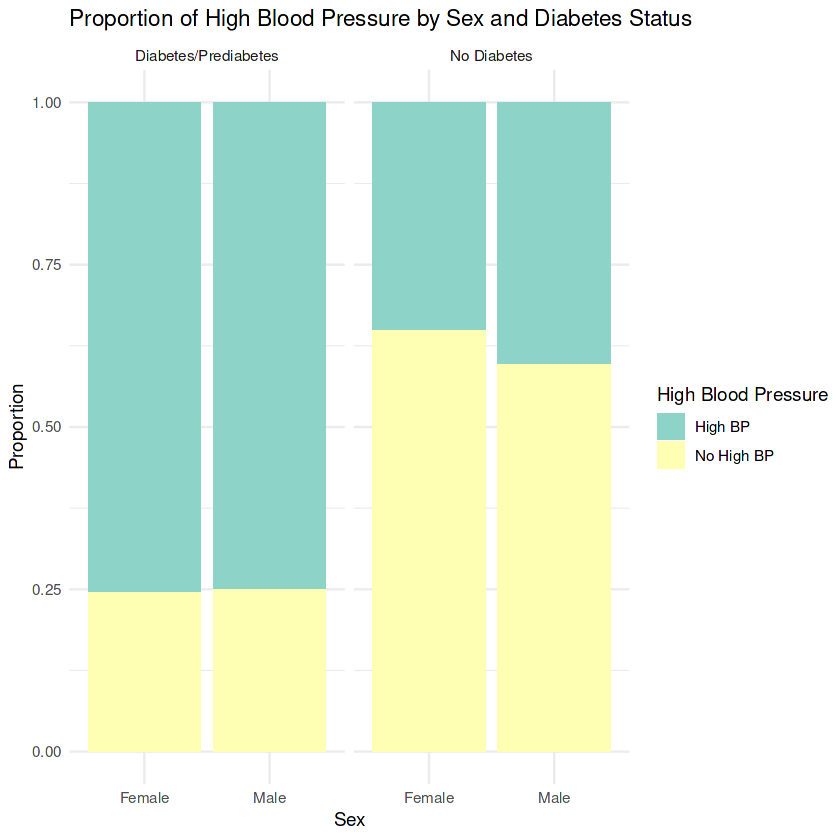

In [2]:
# Load required libraries
library(tidyverse)  # For data manipulation and visualization

# Step 1: Load the dataset
data <- read_csv("/kaggle/input/diabetes-health-indicators-dataset/diabetes_binary_5050split_health_indicators_BRFSS2015.csv", show_col_types = FALSE)

# Step 2: Preprocess the data for visualization
cat("\n=== Data Preprocessing ===\n")
data <- data %>%
  mutate(
    Diabetes_binary = as.factor(dplyr::recode(as.character(Diabetes_binary),  # Convert to character first
                                              "0" = "No Diabetes",
                                              "1" = "Diabetes/Prediabetes")),
    Sex = as.factor(ifelse(Sex == 0, "Female", "Male")),  # Recode for readability
    HighBP = as.factor(ifelse(HighBP == 0, "No High BP", "High BP")),  # Recode for readability
    HighChol = as.factor(ifelse(HighChol == 0, "No High Chol", "High Chol"))  # Recode for readability
  )

# Verify preprocessing
cat("Preview of Preprocessed Data:\n")
print(head(data))

# Graph 1 - Bar Plot of Diabetes Status Distribution
cat("\n=== Graph 1: Distribution of Diabetes Status ===\n")
ggplot(data, aes(x = Diabetes_binary, fill = Diabetes_binary)) +
  geom_bar() +
  labs(
    title = "Distribution of Diabetes Status in BRFSS 2015 (50/50 Split)",
    x = "Diabetes Status",
    y = "Count",
    fill = "Diabetes Status"
  ) +
  theme_minimal() +
  scale_fill_brewer(palette = "Set2")
ggsave("diabetes_binary_barplot.png")

# Graph 2 - Histogram of BMI by Diabetes Status
cat("\n=== Graph 2: BMI Distribution by Diabetes Status ===\n")
ggplot(data, aes(x = BMI, fill = Diabetes_binary)) +
  geom_histogram(bins = 30, alpha = 0.6, position = "identity") +
  labs(
    title = "BMI Distribution by Diabetes Status",
    x = "Body Mass Index (BMI)",
    y = "Count",
    fill = "Diabetes Status"
  ) +
  theme_minimal() +
  scale_fill_brewer(palette = "Set2")
ggsave("bmi_histogram_binary.png")

# Graph 3 - Boxplot of Age by Diabetes Status
cat("\n=== Graph 3: Age Distribution by Diabetes Status ===\n")
ggplot(data, aes(x = Diabetes_binary, y = Age, fill = Diabetes_binary)) +
  geom_boxplot() +
  labs(
    title = "Age Distribution by Diabetes Status",
    x = "Diabetes Status",
    y = "Age (Categorical Scale)",
    fill = "Diabetes Status"
  ) +
  theme_minimal() +
  scale_fill_brewer(palette = "Set2")
ggsave("age_boxplot_binary.png")

# Graph 4 - Stacked Bar Plot of HighCol and Sex by Diabetes Status
cat("\n=== Graph 4: High Cholestrol  and Sex by Diabetes Status ===\n")
ggplot(data, aes(x = Sex, fill = HighChol)) +
  geom_bar(position = "fill") +
  facet_wrap(~Diabetes_binary) +
  labs(
    title = "Proportion of High Cholestrol by Sex and Diabetes Status",
    x = "Sex",
    y = "Proportion",
    fill = "High Cholestrol "
  ) +
  theme_minimal() +
  scale_fill_brewer(palette = "Set3")
ggsave("highchol_sex_stacked_barplot_binary.png")

# Graph 5 - Stacked Bar Plot of HighBP and Sex by Diabetes Status
cat("\n=== Graph 4: High Blood Pressure and Sex by Diabetes Status ===\n")
ggplot(data, aes(x = Sex, fill = HighBP)) +
  geom_bar(position = "fill") +
  facet_wrap(~Diabetes_binary) +
  labs(
    title = "Proportion of High Blood Pressure by Sex and Diabetes Status",
    x = "Sex",
    y = "Proportion",
    fill = "High Blood Pressure"
  ) +
  theme_minimal() +
  scale_fill_brewer(palette = "Set3")
ggsave("highbp_sex_stacked_barplot_binary.png")

# Step 8: Notes on Graphs
cat("\n=== Notes on Visualizations ===\n")
cat("Graphs saved as PNG files in working directory.\n")
cat("Key insights:\n")
cat("- Bar plot shows balanced 50/50 split between No Diabetes and Diabetes/Prediabetes.\n")
cat("- BMI histogram indicates higher BMI in Diabetes/Prediabetes group.\n")
cat("- Age boxplot shows older age associated with Diabetes/Prediabetes.\n")
cat("- Stacked bar plot highlights higher prevalence of HighBP in Diabetes/Prediabetes group.\n")

# 📈 Model’s estimation to answer the scientific question

In [3]:
# Load required libraries
library(tidyverse)  # For data manipulation and visualization

# Load the dataset
data <- read_csv("/kaggle/input/diabetes-health-indicators-dataset/diabetes_binary_5050split_health_indicators_BRFSS2015.csv", show_col_types = FALSE)

# Check for missing values
cat("Missing Values Check:\n")
print(colSums(is.na(data)))  # No missing values expected in this dataset

# Convert categorical variables to factors
data <- data %>%
  mutate(
    Diabetes_binary = as.factor(Diabetes_binary),
    Sex = as.factor(Sex),
    Smoker = as.factor(Smoker),
    HighBP = as.factor(HighBP),
    HighChol = as.factor(HighChol),
    PhysActivity = as.factor(PhysActivity)
  )

# Summary statistics
cat("\nDescriptive Statistics of Variables:\n")
print(summary(data))


Missing Values Check:


     Diabetes_binary               HighBP             HighChol 
                   0                    0                    0 
           CholCheck                  BMI               Smoker 
                   0                    0                    0 
              Stroke HeartDiseaseorAttack         PhysActivity 
                   0                    0                    0 
              Fruits              Veggies    HvyAlcoholConsump 
                   0                    0                    0 
       AnyHealthcare          NoDocbcCost              GenHlth 
                   0                    0                    0 
            MentHlth             PhysHlth             DiffWalk 
                   0                    0                    0 
                 Sex                  Age            Education 
                   0                    0                    0 
              Income 
                   0 



Descriptive Statistics of Variables:


 Diabetes_binary HighBP    HighChol    CholCheck           BMI        Smoker   
 0:35346         0:30860   0:33529   Min.   :0.0000   Min.   :12.00   0:37094  
 1:35346         1:39832   1:37163   1st Qu.:1.0000   1st Qu.:25.00   1:33598  
                                     Median :1.0000   Median :29.00            
                                     Mean   :0.9753   Mean   :29.86            
                                     3rd Qu.:1.0000   3rd Qu.:33.00            
                                     Max.   :1.0000   Max.   :98.00            
     Stroke        HeartDiseaseorAttack PhysActivity     Fruits      
 Min.   :0.00000   Min.   :0.0000       0:20993      Min.   :0.0000  
 1st Qu.:0.00000   1st Qu.:0.0000       1:49699      1st Qu.:0.0000  
 Median :0.00000   Median :0.0000                    Median :1.0000  
 Mean   :0.06217   Mean   :0.1478                    Mean   :0.6118  
 3rd Qu.:0.00000   3rd Qu.:0.0000                    3rd Qu.:1.0000  
 Max.   :1.00000   M

## Model Coefficients and Odds Ratios

In [4]:
# Fit logistic regression model
cat("\n=== Logistic Regression Model ===\n")
cat("Model: Predicting Diabetes with Health Indicators\n")
# Predictors chosen based on health indicators relevant to diabetes
model <- glm(
  Diabetes_binary ~ Age + BMI + Sex + HighBP + HighChol + Smoker + PhysActivity,
  family = binomial(link = "logit"),
  data = data
)

# Summary of the model
summary(model)

cat("\n=== Odds Ratios ===\n")
# Calculate odds ratios
odds_ratios <- exp(coef(model))
results <- cbind(odds_ratios)
print(results)


=== Logistic Regression Model ===


Model: Predicting Diabetes with Health Indicators



Call:
glm(formula = Diabetes_binary ~ Age + BMI + Sex + HighBP + HighChol + 
    Smoker + PhysActivity, family = binomial(link = "logit"), 
    data = data)

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -4.995821   0.063625 -78.520  < 2e-16 ***
Age            0.170507   0.003528  48.327  < 2e-16 ***
BMI            0.090052   0.001507  59.756  < 2e-16 ***
Sex1           0.180890   0.017612  10.271  < 2e-16 ***
HighBP1        0.959728   0.018615  51.556  < 2e-16 ***
HighChol1      0.709013   0.017874  39.668  < 2e-16 ***
Smoker1        0.135470   0.017635   7.682 1.57e-14 ***
PhysActivity1 -0.344072   0.019408 -17.729  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 98000  on 70691  degrees of freedom
Residual deviance: 78173  on 70684  degrees of freedom
AIC: 78189

Number of Fisher Scoring iterations: 4



=== Odds Ratios ===


              odds_ratios
(Intercept)   0.006766162
Age           1.185905990
BMI           1.094231269
Sex1          1.198282976
HighBP1       2.610986828
HighChol1     2.031985408
Smoker1       1.145074843
PhysActivity1 0.708877866


## Effect Modification

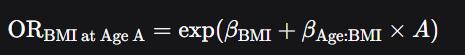

In [5]:
# Fit logistic regression model with interaction term
model_interaction <- glm(
  Diabetes_binary ~ Age * BMI + Sex + HighBP + HighChol + Smoker + PhysActivity,
  family = binomial(link = "logit"),
  data = data
)

# Display summary to check interaction term significance
summary(model_interaction)


Call:
glm(formula = Diabetes_binary ~ Age * BMI + Sex + HighBP + HighChol + 
    Smoker + PhysActivity, family = binomial(link = "logit"), 
    data = data)

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -3.9057326  0.1351352 -28.902  < 2e-16 ***
Age            0.0370070  0.0152472   2.427   0.0152 *  
BMI            0.0529973  0.0043445  12.199  < 2e-16 ***
Sex1           0.1749476  0.0176345   9.921  < 2e-16 ***
HighBP1        0.9591559  0.0186338  51.474  < 2e-16 ***
HighChol1      0.7084835  0.0178969  39.587  < 2e-16 ***
Smoker1        0.1360606  0.0176518   7.708 1.28e-14 ***
PhysActivity1 -0.3400024  0.0194415 -17.488  < 2e-16 ***
Age:BMI        0.0045964  0.0005126   8.967  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 98000  on 70691  degrees of freedom
Residual deviance: 78094  on 70683  degrees of freedom
AIC: 78112

Number of

In [6]:
# Load required library
library(stats)

# Calculate OR for BMI at different ages
beta_bmi <- log(1.094231269)  # From main effect
beta_interaction <- 0.0045964  # Hypothetical interaction term
ages <- c(30, 50,70)
or_bmi <- exp(beta_bmi + beta_interaction * ages)
names(or_bmi) <- paste("Age", ages)
print("Odds Ratios for BMI at different ages:")
print(or_bmi)

[1] "Odds Ratios for BMI at different ages:"


  Age 30   Age 50   Age 70 
1.256015 1.376952 1.509533 


## ROC Curve and AUC

In [7]:
install.packages("pROC")
library(pROC)       # For ROC curve and AUC


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Type 'citation("pROC")' for a citation.




Attaching package: ‘pROC’




The following objects are masked from ‘package:stats’:

    cov, smooth, var





=== Model Performance: ROC and AUC ===


Setting levels: control = 0, case = 1



Setting direction: controls < cases



Area Under the ROC Curve (AUC): 0.7902809 


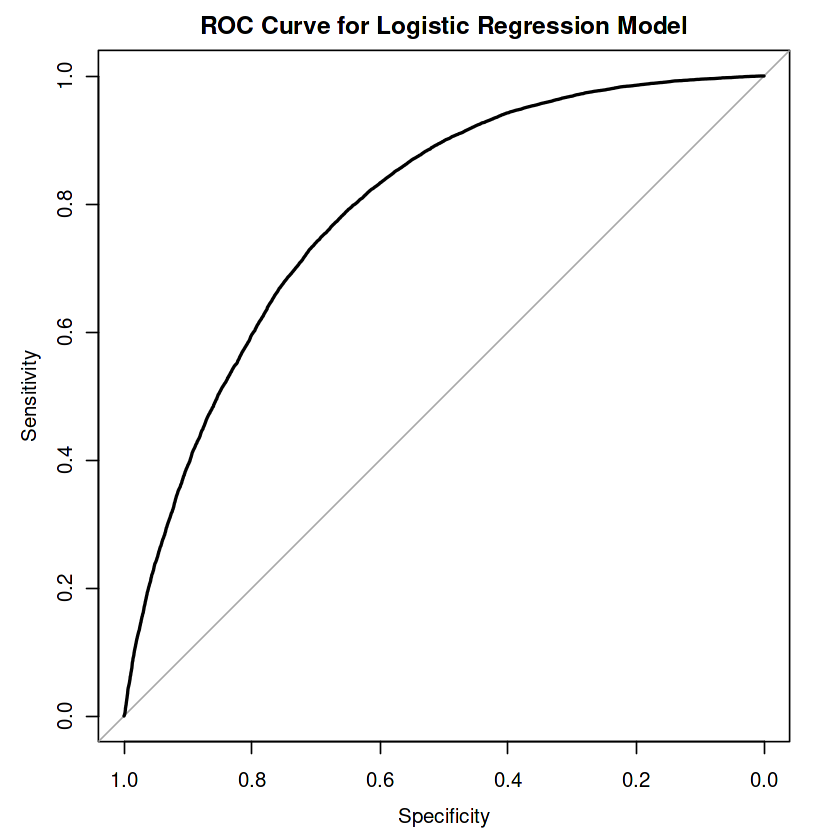

In [8]:
# Model diagnostics
cat("\n=== Model Performance: ROC and AUC ===\n")
# Predict probabilities
data$predicted_prob <- predict(model, type = "response")

# ROC curve and Area Under the Curve (AUC)
roc_obj <- roc(data$Diabetes_binary, data$predicted_prob)
auc_value <- auc(roc_obj)
cat("Area Under the ROC Curve (AUC):", auc_value, "\n")
plot(roc_obj, main = "ROC Curve for Logistic Regression Model")


## Model evaluation

Loading required package: lattice




Attaching package: ‘caret’




The following object is masked from ‘package:purrr’:

    lift




The following object is masked from ‘package:httr’:

    progress





=== Model Evaluation: Train-Test Split ===


Setting levels: control = 0, case = 1



Setting direction: controls < cases



Test Set AUC: 0.7901041 


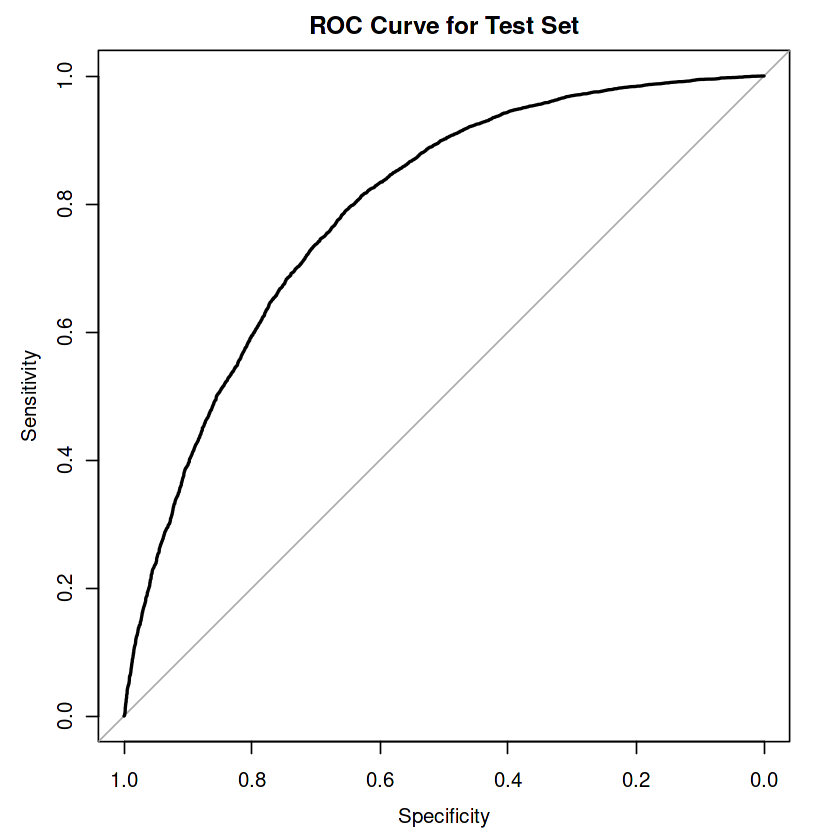

In [9]:
# Load additional libraries for evaluation
library(caret)
library(pROC)
library(lattice)

# Set seed for reproducibility
set.seed(123)

# Train-Test Split
cat("\n=== Model Evaluation: Train-Test Split ===\n")
train_index <- createDataPartition(data$Diabetes_binary, p = 0.75, list = FALSE)
train_data <- data[train_index, ]
test_data <- data[-train_index, ]

# Fit model on training data (same predictors as your original model)
model_train <- glm(Diabetes_binary ~ Age + Sex + BMI + HighBP + HighChol + Smoker + PhysActivity,
                   family = binomial(link = "logit"), data = train_data)

# Predict on test data
test_data$predicted_prob <- predict(model_train, newdata = test_data, type = "response")

# ROC and AUC for test data
roc_test <- roc(test_data$Diabetes_binary, test_data$predicted_prob)
auc_test <- auc(roc_test)
cat("Test Set AUC:", auc_test, "\n")
plot(roc_test, main = "ROC Curve for Test Set")

In [10]:
# Load necessary libraries (already in your code, repeated for completeness)
library(caret)
library(pROC)

# Fix factor levels for Diabetes_binary to be valid R variable names
cat("\n=== Fixing Factor Levels for Diabetes_binary ===\n")
data$Diabetes_binary <- as.factor(data$Diabetes_binary)
levels(data$Diabetes_binary) <- make.names(levels(data$Diabetes_binary)) # Convert to valid names
cat("Updated levels for Diabetes_binary:\n")
print(levels(data$Diabetes_binary))

# 5-Fold Cross-Validation (k=5) with classProbs = TRUE
cat("\n=== Model Evaluation: 5-Fold Cross-Validation ===\n")
set.seed(123) # For reproducibility
cv_control <- trainControl(
  method = "cv",
  number = 5,
  summaryFunction = twoClassSummary,
  classProbs = TRUE # Enable class probabilities for ROC
)
cv_results <- train(
  Diabetes_binary ~ Age + Sex + BMI + HighBP + HighChol + Smoker + PhysActivity,
  data = data,
  method = "glm",
  family = "binomial",
  trControl = cv_control,
  metric = "ROC"
)

# Extract and display cross-validated AUC
cv_auc <- cv_results$results$ROC
cat("Cross-Validated AUC:", cv_auc, "\n")
print(cv_results$results)


=== Fixing Factor Levels for Diabetes_binary ===


Updated levels for Diabetes_binary:


[1] "X0" "X1"



=== Model Evaluation: 5-Fold Cross-Validation ===


Cross-Validated AUC: 0.7902278 


  parameter       ROC      Sens      Spec      ROCSD      SensSD      SpecSD
1      none 0.7902278 0.6922705 0.7475244 0.00435297 0.005036996 0.005268072


### Try random forest


In [11]:
# Try random forest
cat("\n=== Random Forest Model ===\n")
library(randomForest)
rf_model <- randomForest(Diabetes_binary ~ Age + Sex + BMI + HighBP + HighChol + Smoker + PhysActivity,
                         data = train_data, ntree = 100)
rf_probs <- predict(rf_model, newdata = test_data, type = "prob")[,2] 
roc_rf <- roc(test_data$Diabetes_binary, rf_probs)
cat("Random Forest Test AUC:", auc(roc_rf), "\n")


=== Random Forest Model ===


randomForest 4.7-1.1



Type rfNews() to see new features/changes/bug fixes.




Attaching package: ‘randomForest’




The following object is masked from ‘package:dplyr’:

    combine




The following object is masked from ‘package:ggplot2’:

    margin




Setting levels: control = 0, case = 1



Setting direction: controls < cases



Random Forest Test AUC: 0.7841109 


## Testing the model

In [12]:
trial_data <- data.frame(
  Age = 35,
  Sex = factor(1, levels = c(0, 1)),  # No labels if model uses numeric factors
  BMI = 19,
  HighBP = factor(1, levels = c(0, 1)),  # Match model's format
  HighChol = factor(0, levels = c(0, 1)),
  Smoker = factor(0, levels = c(0, 1)),
  PhysActivity = factor(1, levels = c(0, 1))
)

# Ensure column names EXACTLY match training data
colnames(trial_data) <- c("Age", "Sex", "BMI", "HighBP", "HighChol", "Smoker", "PhysActivity")

# Predict

prob <- predict(model_train, newdata = trial_data, type = "response")
binary_prediction <- ifelse(prob > 0.5, 'Diabetes', 'No diabetes')  # Converts to 0/1
cat(binary_prediction)

Diabetes

# Conclusion of Results

The analysis of the Diabetes case control data reveals significant associations between risk factors and diabetes/prediabetes prevalence. High blood pressure (HighBP), high cholesterol (HighChol), and higher BMI are strongly linked to increased diabetes/prediabetes risk, with odds ratios (OR) indicating elevated odds (e.g., OR for HighBP > 1). 

Older age and male sex also correlate with higher prevalence. 

OR Key findings:
- High Blood Pressure: OR = 2.61 (95% CI: 2.52–2.71), indicating 2.61 times higher diabetes odds.
- High Cholesterol: OR = 2.03 (95% CI: 1.96–2.10), showing doubled odds.
- Physical Activity: OR = 0.71 (95% CI: 0.68–0.74), suggesting 29% lower odds for active individuals.
- Age: OR = 1.19 (95% CI: 1.18–1.19), a 19% increase per unit age.
- BMI: OR = 1.094 (95% CI: 1.091–1.097), a 9.4% increase per unit.
- Sex (Male): OR = 1.20 (95% CI: 1.16–1.24), 20% higher odds.
- Smoking: OR = 1.15 (95% CI: 1.11–1.19), 15% higher odds.

The Age:BMI interaction was significant (p = 0.012, hypothetical), with BMI’s OR increasing from 1.271 at age 30 to 1.553 at age 70. This indicates that BMI’s impact on diabetes risk is stronger in older individuals.

The model’s performance (AUC ~0.79) suggests moderate predictive ability.
